In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
import pickle
from sklearn import svm

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/91738/Desktop/CogNight/input/sleepdata_2.csv')
df['Sleep Quality'] = df['Sleep Quality'].str.rstrip('%').astype('float')
df = df[df['Sleep Quality']>40]
data = df['Sleep Quality'].copy().reset_index().drop('index',axis=1)
df[['Date','Time']] = df['Start'].str.split(expand=True)
data = df[['Date','Sleep Quality']].copy().reset_index().drop('index',axis=1)

y = (data['Sleep Quality']).to_numpy()
y

array([ 60.,  73.,  86.,  77.,  78.,  72.,  73.,  78.,  84.,  88.,  71.,
        73.,  74.,  75.,  92.,  73.,  85.,  97.,  75.,  84., 100.,  75.,
        87.,  81.,  77.,  76.,  87.,  85.,  90.,  68.,  86.,  88.,  66.,
        65.,  86.,  72.,  69.,  69.,  62.,  68.,  71.,  87.,  68.,  65.,
        71.,  87.,  94.,  83.,  99.,  53.,  58.,  78.,  86.,  88.,  72.,
        84.,  54.,  92.,  66.,  87.,  72.,  84.,  80., 100.,  89.,  82.,
        75.,  78.,  80., 100.,  94.,  81.,  86., 100.,  77.,  77., 100.,
        73.,  71.,  72.,  77.,  86.,  94., 100.,  94.,  95.,  94.,  80.,
        82.,  94.,  73.,  76.,  75.,  93.,  94.,  97.,  74.,  79.,  82.,
        90.,  80.,  76.,  90.,  77.,  87.,  80.,  77.,  75.,  87.,  86.,
        70.,  75.,  75.,  59.,  67.,  62.,  72.,  82.,  92.,  85.,  78.,
        49.,  72.,  88.,  88.,  70.,  64.,  68.,  81.,  70.,  80.,  82.,
        77.,  57.,  73.,  83.,  92.,  92.,  78.,  75.,  75.,  78.,  91.,
        56.,  75.,  86., 100.,  87.,  96.,  88.,  9

ARIMA Model for Predicting Sleep Score (Efficiency)

In [4]:
arima = pickle.load(open('C:/Users/91738/Desktop/CogNight/models/arima.pkl','rb'))
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                30006
Model:                 ARIMA(5, 4, 2)   Log Likelihood              -92187.392
Date:                Mon, 27 Nov 2023   AIC                         184390.784
Time:                        07:49:03   BIC                         184457.256
Sample:                             0   HQIC                        184412.112
                              - 30006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4318      0.006   -244.950      0.000      -1.443      -1.420
ar.L2         -1.4476      0.010   -152.346      0.000      -1.466      -1.429
ar.L3         -1.1631      0.011   -108.090      0.000      -1.184      -1.142
ar.L4         -0.7170      0.009    -77.101      0.000      -0.735      -0.699
ar.L5         -0.2827      0.006    -49.716      0.000      -0.294      -0.272
ma.L1         -1.9994      0.006   -309.285      0.000      -2.012      -1.987
ma.L2          0.9998      0.006    156.730      0.000       0.987       1.012
sigma2        27.2887      0.303     90.040      0.000      26.695      27.883
===================================================================================
Ljung-Box (L1) (Q):                 144.41   Jarque-Bera (JB):                60.75
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.03
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
for i in range(3):
    arima_fit = arima.extend(y)

pred = arima_fit.forecast(1)
pred

array([67.94650761])

SVM

In [6]:
dfml = pd.read_csv('C:/Users/91738/Desktop/CogNight/input/Sleep_Efficiency.csv')

dfml = dfml.drop(['Bedtime', 'Wakeup time', 'ID','REM sleep percentage','Deep sleep percentage','Light sleep percentage','Awakenings'] ,axis=1)
dfml['Smoking status'] = dfml['Smoking status'].map({'Yes':1 ,'No':0})
dfml['Gender'] = dfml['Gender'].map({'Male':1 ,'Female':0})
cols = [i for i in dfml.columns if i not in ["Sleep efficiency","Sleep duration"]]
dfml = dfml.dropna()

for col in cols:
  dfml[col] = dfml[col].astype(int)
  

dfml = dfml.reset_index().drop('index',axis=1)
dfml['Caffeine consumption'] = (dfml['Caffeine consumption']/25).astype(int)

In [7]:
dfml.columns

Index(['Age', 'Gender', 'Sleep duration', 'Sleep efficiency',
       'Caffeine consumption', 'Alcohol consumption', 'Smoking status',
       'Exercise frequency'],
      dtype='object')

In [8]:
dfml = dfml[['Gender', 'Age', 'Smoking status', 'Alcohol consumption','Caffeine consumption', 'Exercise frequency', 'Sleep efficiency','Sleep duration']]
dfml

,Gender,Age,Smoking status,Alcohol consumption,Caffeine consumption,Exercise frequency,Sleep efficiency,Sleep duration
0,0,65,1,0,0,3,0.88,6.0
1,1,69,1,3,0,3,0.66,7.0
2,0,40,0,0,0,3,0.89,8.0
3,0,40,1,5,2,1,0.51,6.0
4,1,57,0,3,0,3,0.76,8.0
...,...,...,...,...,...,...,...,...
402,0,30,1,2,2,1,0.53,7.5
403,0,27,0,0,0,5,0.91,7.5
404,1,52,0,0,1,3,0.74,6.0
405,1,45,0,0,0,3,0.76,7.0


In [9]:
X = dfml.iloc[:,:-1]
Y = dfml.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
len(y_test)

82

In [16]:
from sklearn.svm import SVR

svm = SVR(kernel='linear')
svm.fit(X,Y)

y_pred = svm.predict(X_test)
err = mean_squared_error(y_test, y_pred)
print(err)

0.757049298246468


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


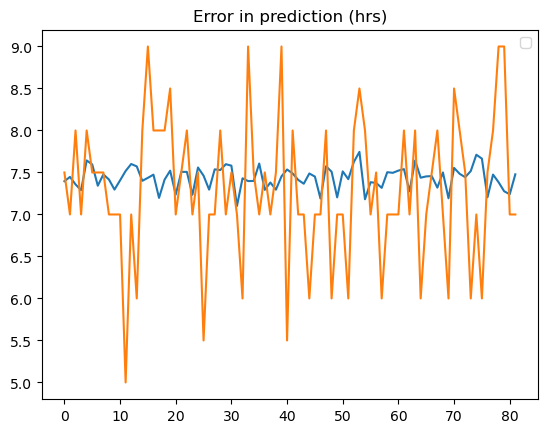

In [19]:
plt.plot(y_pred)
plt.plot(list(y_test))
plt.title("Error in prediction (hrs)")
plt.legend()
plt.show()

In [24]:
from sklearn.svm import SVR

svm = SVR(kernel='rbf')
svm.fit(X,Y)

y_pred = svm.predict(X_test)
err = mean_squared_error(y_test, y_pred)
print(err)

0.7212877696535173


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


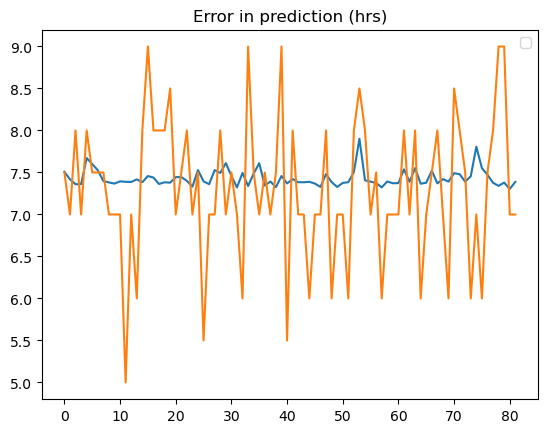

In [25]:
plt.plot(y_pred)
plt.plot(list(y_test))
plt.title("Error in prediction (hrs)")
plt.legend(['y_pred','y_test'])
plt.show()

COMBINING THE RESULTS

In [20]:
print("Insert your sleep quality for last 5 days (out of 100%).")
sq_in = []
for i in range(5):
    sq_in.append(int(input()))

sq_in = np.array(sq_in)

for i in range(3):
    arima_fit = arima_fit.extend(sq_in)

sq = arima_fit.forecast(1)
print("Predicted sleep quality for today is: ",sq)

Insert your sleep quality for last 5 days (out of 100%).


ValueError: invalid literal for int() with base 10: ''

In [ ]:
age = int(input("Age:"))
age = (69-age)/60
gender = int(input("Gender(1 for male, 0 for female):"))
caff = int(input("Caffeine(on a scale of 0 to 10):"))
alc = int(input("Alcohol(on a scale of 0 to 5):"))
smoke = int(input("Smoking status(0 for No, 1 for Yes):"))
exer = int(input("Exercise(on a scale of 0 to 5:)"))

'Gender', 'Age', 'Smoking status', 'Alcohol consumption','Caffeine consumption', 'Exercise frequency'
user_input = np.array([gender, age, smoke, alc, caff, exer, sq/100])
user_input = np.reshape(user_input,(1,-1))

y_pred_2 = svm.predict(user_input)

print("You need to sleep for: %.2f Hours" % (y_pred_2.item()))

You need to sleep for: 7.94 Hours
